In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 18s 2us/step


In [8]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3795 - accuracy: 0.8910 - val_loss: 0.1807 - val_accuracy: 0.9493
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9556 - val_loss: 0.1341 - val_accuracy: 0.9611
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1080 - accuracy: 0.9678 - val_loss: 0.1209 - val_accuracy: 0.9630
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9759 - val_loss: 0.1011 - val_accuracy: 0.9701
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0642 - accuracy: 0.9805 - val_loss: 0.1000 - val_accuracy: 0.9701
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9847 - val_loss: 0.0947 - val_accuracy: 0.9711
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.1019 - val_accuracy: 0.9713
Epoch 

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9773
Test accuracy: 97.73%


In [14]:
sample_image = x_test[0]  
sample_image = sample_image.reshape(1, 784)
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)
print(f"Predicted label: {predicted_label}")

1/1 [==============================] - 0s 89ms/step
Predicted label: 7


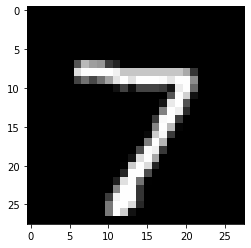

In [15]:
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.show()